<a href="https://colab.research.google.com/github/KalebAvila/Deep_Learning/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 1 Deep Learning.
Kaleb Azael Avila Padilla 724405

Deep Learning primavera 2024.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

En este proyecto voy a usar el Denoising Autoencoder que vimos durante clases para imagenes de beisbol que es mi deporte favortio y ver como este puede funcionar.

* 1. Carga de Imágenes:
Se Cargaran las imagenes de pelotas de beisbol para poder hacer el modelo, para eso use varias paqueterias y tambien tensorflow para su preprocesamiento.

* 2. Preprocesamiento de Datos:
Las imágenes cargadas se dividen en conjuntos de entrenamiento y prueba.

* 3. Arquitectura del Modelo:
El modelo de autoencoder consta de un codificador y un decodificador.
El codificador comprime la imagen de entrada en una representación de espacio latente de menor dimensión.
El decodificador reconstruye la imagen original a partir de la representación en el espacio latente.

* 4. Entrenamiento del Modelo:
El modelo de autoencoder se compila.
El modelo se entrena en el conjunto de entrenamiento y se evalúa en el conjunto de prueba.

* 5. Codificación y Decodificación:
El codificador entrenado se utiliza para codificar las imágenes de prueba en el espacio latente.
El decodificador se utiliza para reconstruir las imágenes originales a partir de las representaciones codificadas.

* 6. Visualización:
La función se utiliza para visualizar las imágenes originales, sus representaciones en el espacio latente y las imágenes reconstruidas.






In [2]:
def load_images_from_folder(folder):
  """
  Loads images from a folder and its subfolders.

  Args:
    folder: The path to the folder containing the images.

  Returns:
    A list of images as NumPy arrays.
  """

  images = []
  for root, dirs, files in os.walk(folder):
    for filename in files:
      if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(root, filename)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28))
        image = tf.keras.preprocessing.image.img_to_array(image)
        images.append(image)

  return np.array(images)

# Load images from the "train" folder
images = load_images_from_folder('/content/drive/MyDrive/Deep_learning/Examen/Sports-Ball-Dataset/Baseball')

images = images / 255.0
# Print the number of loaded images
print(f"Number of loaded images: {len(images)}")


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Number of loaded images: 251


In [3]:
images.shape

(251, 28, 28, 3)

In [4]:
(X_train, y_train) = images,images
(X_test, y_test) = images,images

In [5]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train.shape

(251, 28, 28, 3)

In [6]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train.shape, X_test.shape

((753, 784), (753, 784))

In [14]:
# Try increasing the encoding_dim to 24
encoding_dim = 24

input_img = Input(shape = (784, ))
encoded = Dense(128, activation = "relu")(input_img)
encoded = Dense(encoding_dim, activation = "relu")(encoded)

decoded = Dense(128, activation = "relu")(encoded)
decoded = Dense(784, activation = "sigmoid")(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

decoded_layer1 = autoencoder.layers[-2]
decoded_layer2 = autoencoder.layers[-1]
encoded_input = Input(shape=(encoding_dim,))
decoder = Model(encoded_input, decoded_layer2(decoded_layer1(encoded_input)) )

autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

autoencoder.fit(
    X_train,
    X_train,
    epochs = 5,
    validation_data = (X_test, X_test)
)

encoded_images = encoder.predict(X_test)
encoded_images.shape

predicted_images = decoder.predict(encoded_images)


Epoch 1/5
24/24 [==============================] - 1s 11ms/step - loss: 0.6725 - val_loss: 0.6032
Epoch 2/5
24/24 [==============================] - 0s 6ms/step - loss: 0.3605 - val_loss: 0.0731
Epoch 3/5
24/24 [==============================] - 0s 6ms/step - loss: 0.0306 - val_loss: 0.0214
Epoch 4/5
24/24 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.0215
Epoch 5/5
24/24 [==============================] - 0s 1ms/step


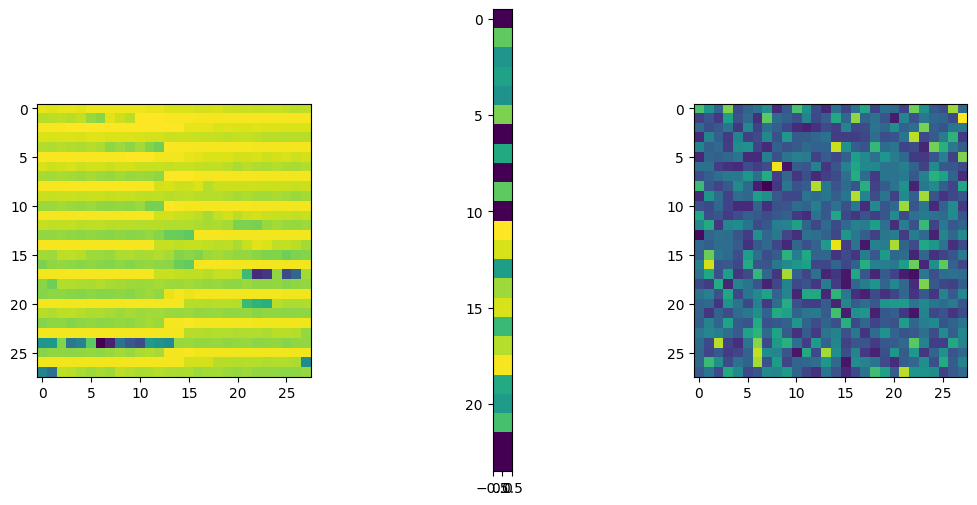

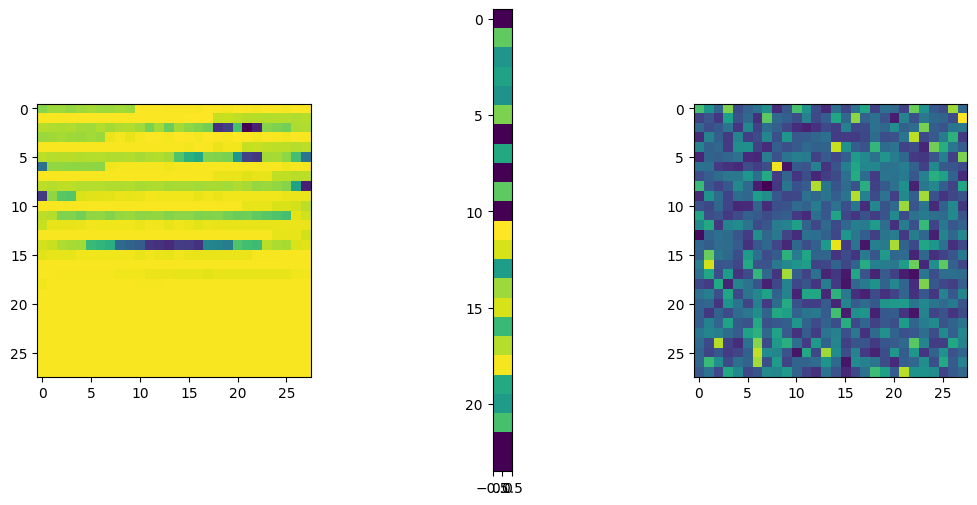

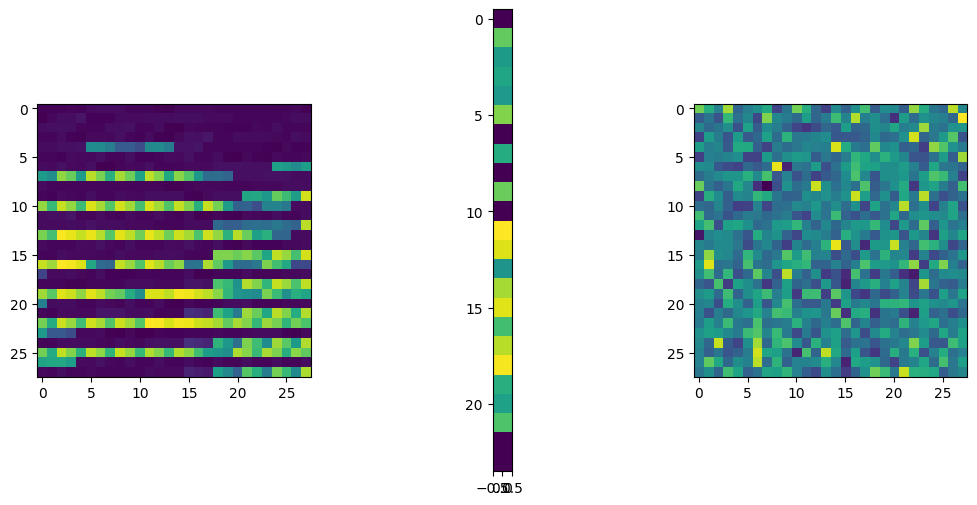

In [15]:
import matplotlib.pyplot as plt

def plot_latent_space(i):
  f = plt.figure(figsize = (12, 6))
  # Original
  f.add_subplot(1, 3, 1)
  plt.imshow(X_test[i].reshape(28, 28))

  # Latent Space
  f.add_subplot(1, 3, 2)
  plt.imshow(encoded_images[i].reshape(-1, 1))

  # Decoded
  f.add_subplot(1, 3, 3)
  plt.imshow(predicted_images[i].reshape(28, 28))

plot_latent_space(1)
plot_latent_space(2)
plot_latent_space(3)